In [30]:
import networkx as nx
import matplotlib.pyplot as plt
from random import *

def rd_dag(n,p,fname = ''):
    'generate random dag of order n with edge probability p'

    G = nx.gnp_random_graph(n,p,directed = True)
    weight = {} #to create random order of vertices
    for v in G.nodes():
        weight[v] = random()
    D = nx.DiGraph([e for e in G.edges() if weight[e[0]]<weight[e[1]]])
    if fname != '': #write as graphml file is fname is specified
        nx.write_graphml(D, fname)
    return D

In [31]:
def count_sinks(D):
    # this is a list comprehension that sums all the 1's returned 
    # if any nodes don't have any outgoing nodes 
    return sum(1 for node in D.nodes() if D.out_degree(node) == 0)

In [32]:
# Test with (< 10)
D = rd_dag(6,0.23)
count_sinks(D)

1

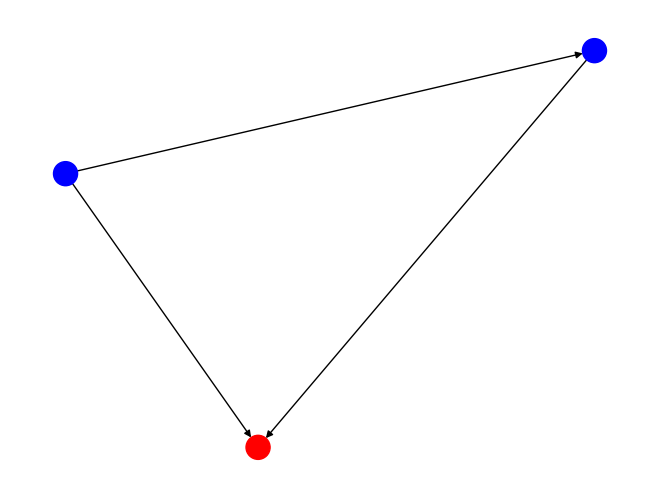

In [33]:
# assigning color 'red' to all nodes which has no outgoing nodes else 'blue'
color = ['red' if D.out_degree(node) == 0 else 'blue' for node in D.nodes()]
nx.draw(D, node_color = color)
plt.show()

In [34]:
# Test with (> 100)
D = rd_dag(120,0.23)
print(count_sinks(D))

2


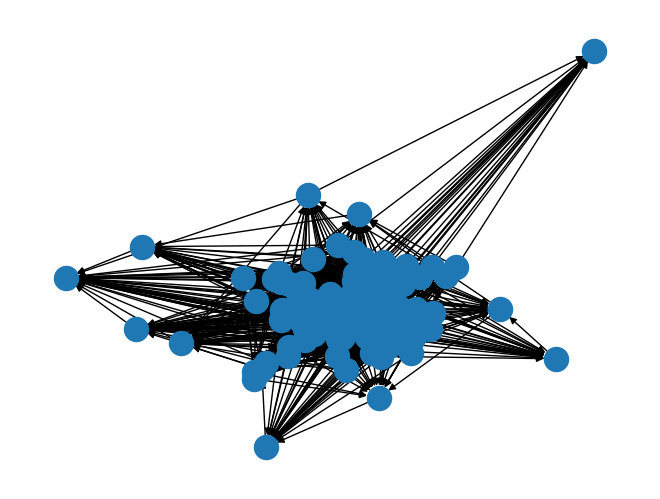

In [35]:
nx.draw(D)
plt.show()

In [36]:
def count_sources(D):
    # this is a list comprehension that sums all the 1's returned 
    # if any nodes don't have any incoming nodes 
    return sum(1 for node in D.nodes() if D.in_degree(node) == 0)

In [37]:
# Test with (< 10)
D = rd_dag(6,0.23)
count_sources(D)

2

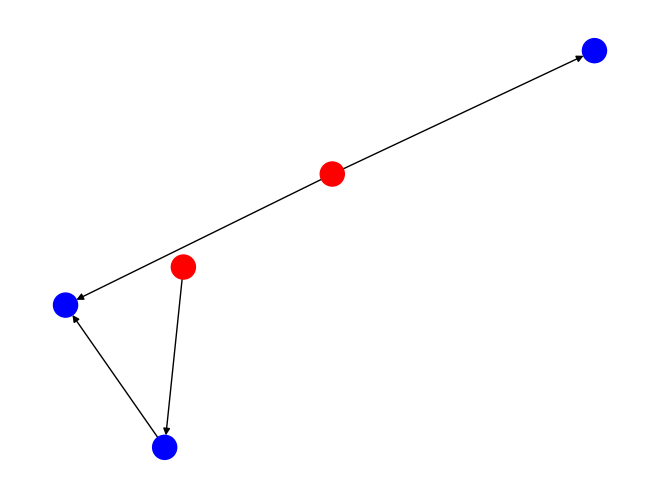

In [38]:
# assigning color 'red' to all nodes which has no indegree nodes else 'blue'
color = ['red' if D.in_degree(node) == 0 else 'blue' for node in D.nodes()]
nx.draw(D, node_color = color)
plt.show()

In [39]:
# Test with (> 100)
D = rd_dag(120,0.23)
print(count_sources(D))

1


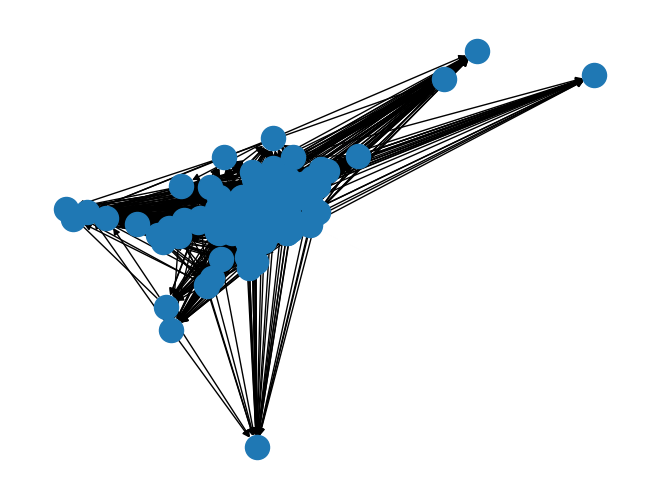

In [40]:
nx.draw(D)
plt.show()

In [41]:
import numpy as np

def exp_dag():
    n = 1000
    # using numpy linspace function to generate the random numbers 
    # from 0 to 1(inclusive) with total 100 values evenly spaced
    p = np.linspace(0, 1, 100)
    # result dict to store p value as key, and tuple of source and sink count as values
    result = {}
    # loops through values of p (from index 0 to 99)
    for i in range(len(p)):
        # calls the random DAG generator function
        D = rd_dag(n, p[i])
        # assign p as key and the tuple (sink count, source count) as value 
        result[float(round(p[i], 3))] = ((count_sinks(D), count_sources(D)))
    # return the result containing array of tuples (sink and source count)
    return result

In [42]:
exp_dag()

{0.0: (0, 0),
 0.01: (106, 100),
 0.02: (46, 51),
 0.03: (26, 36),
 0.04: (27, 31),
 0.051: (19, 17),
 0.061: (17, 17),
 0.071: (15, 13),
 0.081: (10, 16),
 0.091: (16, 14),
 0.101: (13, 10),
 0.111: (9, 8),
 0.121: (7, 10),
 0.131: (8, 8),
 0.141: (6, 7),
 0.152: (5, 8),
 0.162: (6, 6),
 0.172: (3, 6),
 0.182: (7, 7),
 0.192: (5, 5),
 0.202: (6, 7),
 0.212: (5, 5),
 0.222: (1, 4),
 0.232: (3, 5),
 0.242: (3, 4),
 0.253: (6, 4),
 0.263: (5, 5),
 0.273: (4, 4),
 0.283: (2, 3),
 0.293: (4, 4),
 0.303: (4, 3),
 0.313: (4, 4),
 0.323: (2, 5),
 0.333: (4, 2),
 0.343: (1, 3),
 0.354: (4, 1),
 0.364: (3, 3),
 0.374: (2, 3),
 0.384: (2, 4),
 0.394: (2, 2),
 0.404: (2, 2),
 0.414: (1, 1),
 0.424: (3, 3),
 0.434: (2, 2),
 0.444: (2, 2),
 0.455: (2, 3),
 0.465: (1, 3),
 0.475: (1, 3),
 0.485: (3, 2),
 0.495: (2, 3),
 0.505: (2, 2),
 0.515: (2, 1),
 0.525: (1, 1),
 0.535: (1, 1),
 0.545: (2, 1),
 0.556: (2, 1),
 0.566: (2, 1),
 0.576: (1, 2),
 0.586: (2, 2),
 0.596: (2, 2),
 0.606: (2, 2),
 0.616: